In [1]:
import argparse
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import  mean_absolute_error
import matplotlib.pyplot as plt
import pickle
from scipy.stats import ttest_rel

In [2]:
plt.rcParams.update({'font.size': 26})
plt.rcParams['axes.xmargin'] = 0.02
plt.rcParams['axes.ymargin'] = 0.02

#project_dir = Path('/Users/jdafflon/Code/bblocks-phenotypes/')
#project_dir = Path('/home/jdafflon/bblocks-phenotypes/')
project_dir = Path('/Users/jdafflon/Code/brain-phenotypes')

figs_dir = project_dir / 'figs'
figs_dir.mkdir(exist_ok=True, parents=True)

# Create output dir 
output_dir = figs_dir / 'preprint_figs'
output_dir.mkdir(exist_ok=True, parents=True)

In [3]:
# load the data
def load_data_reconstruction(dataset, file_dir, y_val):
    # load the list of targets
    if dataset == 'PNC':
        #folder_name = f"regress_covariates_predictions-pnc-latent_targets_svd-zscore_y_val_{y_val}_column-005_component"
        folder_name = f"regress_covariates_predictions-{dataset.lower()}-latent_targets_svd-zscore_y_val_{y_val}_column-039_component"
    elif dataset == 'HCP':
        folder_name = f"regress_covariates_predictions-{dataset.lower()}-latent_targets_svd-zscore_y_val_{y_val}_column-083_component"
    elif dataset == "HBN":
        folder_name = f"regress_covariates_predictions-{dataset.lower()}-latent_targets_svd-zscore_y_val_{y_val}_column-029_component"
    metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)

    dict_corr_mean = {}
    dict_corr_std = {}
    dict_r2_mean = {}
    dict_r2_std = {}
    for i_recon, n_recons in enumerate(recons):
        experiment_name = f"regress_covariates_predictions-{dataset.lower()}-latent_targets_svd-zscore_y_val_{y_val}_column-{n_recons:03d}_component"
        experiment_path = file_dir / experiment_name

        with open(experiment_path / 'metrics.pickle', 'rb') as handle:
            metrics_dic = pickle.load(handle)
        sorted_targets = metrics['sorted_targets']
        res = np.load(experiment_path / 'reconstructed_predictions.npz',
                allow_pickle=True)
        corr_data = np.array(metrics_dic['Correlation'])
        r2_data = np.array(metrics_dic['R2'])

        # save the results
        dict_corr_mean[f'mean_{n_recons}'] = np.mean(corr_data, axis=0)
        dict_corr_std[f'std_{n_recons}'] = np.std(corr_data, axis=0)
        dict_r2_mean[f'mean_{n_recons}'] = np.mean(r2_data, axis=0)
        dict_r2_std[f'std_{n_recons}'] = np.std(r2_data, axis=0)

    df_corr_mean = pd.DataFrame(dict_corr_mean)
    df_r2_mean = pd.DataFrame(dict_r2_mean)
    df_corr_std = pd.DataFrame(dict_corr_std)
    df_r2_std = pd.DataFrame(dict_r2_std)

   # reorder the dataframe to be in the same order as the prediction for all
   # targets. The first metric should be the one that we can predict best
    df_corr_mean = df_corr_mean.reindex(metrics['arg_sort'])
    df_corr_std = df_corr_std.reindex(metrics['arg_sort'])
    df_r2_mean = df_r2_mean.reindex(metrics['arg_sort'])
    df_r2_std = df_r2_std.reindex(metrics['arg_sort'])

    return df_corr_mean, df_corr_std, df_r2_mean, df_r2_std, sorted_targets

# No regression

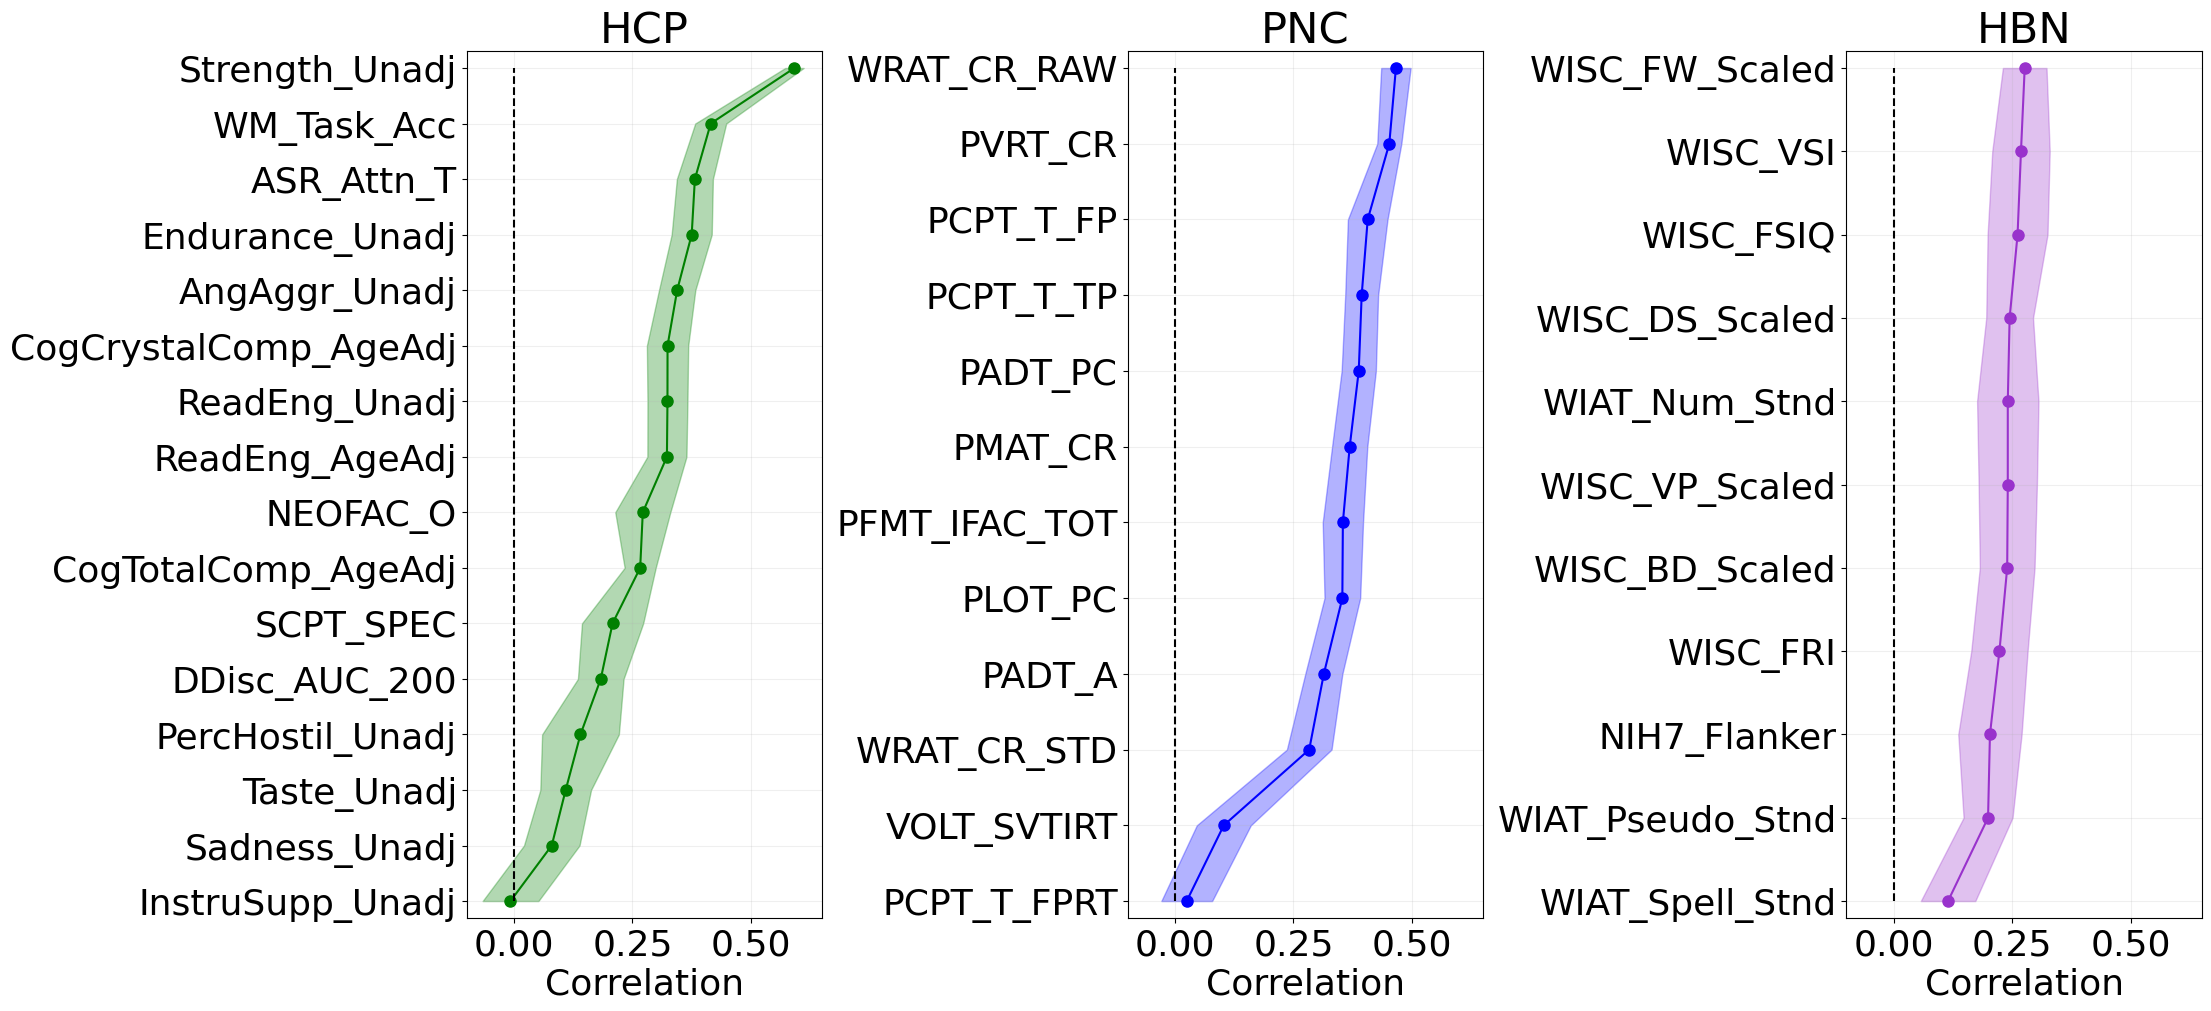

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(22, 10), layout='constrained')


###########################################################################################
# HCP
###########################################################################################
dataset = 'HCP'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [83]

folder_name = f"no_regress_covariates_predictions-{dataset.lower()}_raw_targets"
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
hcp_corr = np.array(metrics_dic['Correlation'])
selected_targets_no_regression_hcp = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(selected_targets_no_regression_hcp)/7))
indices = list(range(10)) + list(range(9, len(selected_targets_no_regression_hcp), spacing)) # 22 elements
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(hcp_corr, axis=0)[arg_sort][indices]
sorted_targets = selected_targets_no_regression_hcp[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = sorted_targets[::-1]

# plot
ax[0].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='green')
ax[0].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(hcp_corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(hcp_corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='green')

ax[0].grid(alpha=.2)
ax[0].set_title(dataset)

# add line at 0
ax[0].vlines(0, sorted_targets[0], sorted_targets[-1], colors='black', linestyle='dashed')
ax[0].set(xlabel="Correlation")
ax[0].set_xlim([-.1, .65])



###########################################################################################
# PNC
###########################################################################################
dataset = 'PNC'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [39]

folder_name = f"no_regress_covariates_predictions-{dataset.lower()}_raw_targets"
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
pnc_corr = np.array(metrics_dic['Correlation'])
selected_targets_no_regression_pnc = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(selected_targets_no_regression_pnc)/3))
indices = list(range(10)) + list(range(9, len(selected_targets_no_regression_pnc), spacing))
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(pnc_corr, axis=0)[arg_sort][indices]
sorted_targets = selected_targets_no_regression_pnc[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = sorted_targets[::-1]

# plot
ax[1].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='blue')
ax[1].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(pnc_corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(pnc_corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='blue')
ax[1].grid(alpha=.2)
ax[1].set_title(dataset)
ax[1].set(xlabel="Correlation")
ax[1].set_xlim([-.1, .65])


# add line at 0
ax[1].vlines(0, sorted_targets[0], sorted_targets[-1], colors='black', linestyle='dashed')



###########################################################################################
# HBN
###########################################################################################
dataset = 'HBN'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [29]

folder_name = f"no_regress_covariates_predictions-{dataset.lower()}_raw_targets"
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
hbn_corr = np.array(metrics_dic['Correlation'])
selected_targets_no_regression_hbn = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(selected_targets_no_regression_hbn)/2))
indices = list(range(10)) + list(range(9, len(selected_targets_no_regression_hbn), spacing))
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(hbn_corr, axis=0)[arg_sort][indices]
sorted_targets = selected_targets_no_regression_hbn[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = sorted_targets[::-1]

# plot
ax[2].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='darkorchid')
ax[2].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(hbn_corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(hbn_corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='darkorchid')
ax[2].grid(alpha=.2)
ax[2].set_title(dataset)
ax[2].set(xlabel="Correlation")
ax[2].set_xlim([-.1, .65])


# add line at 0
ax[2].vlines(0, sorted_targets[0], sorted_targets[-1], colors='black', linestyle='dashed')

plt.savefig(output_dir / 'poster_no_regression.png', dpi=300)
plt.show()


# regression

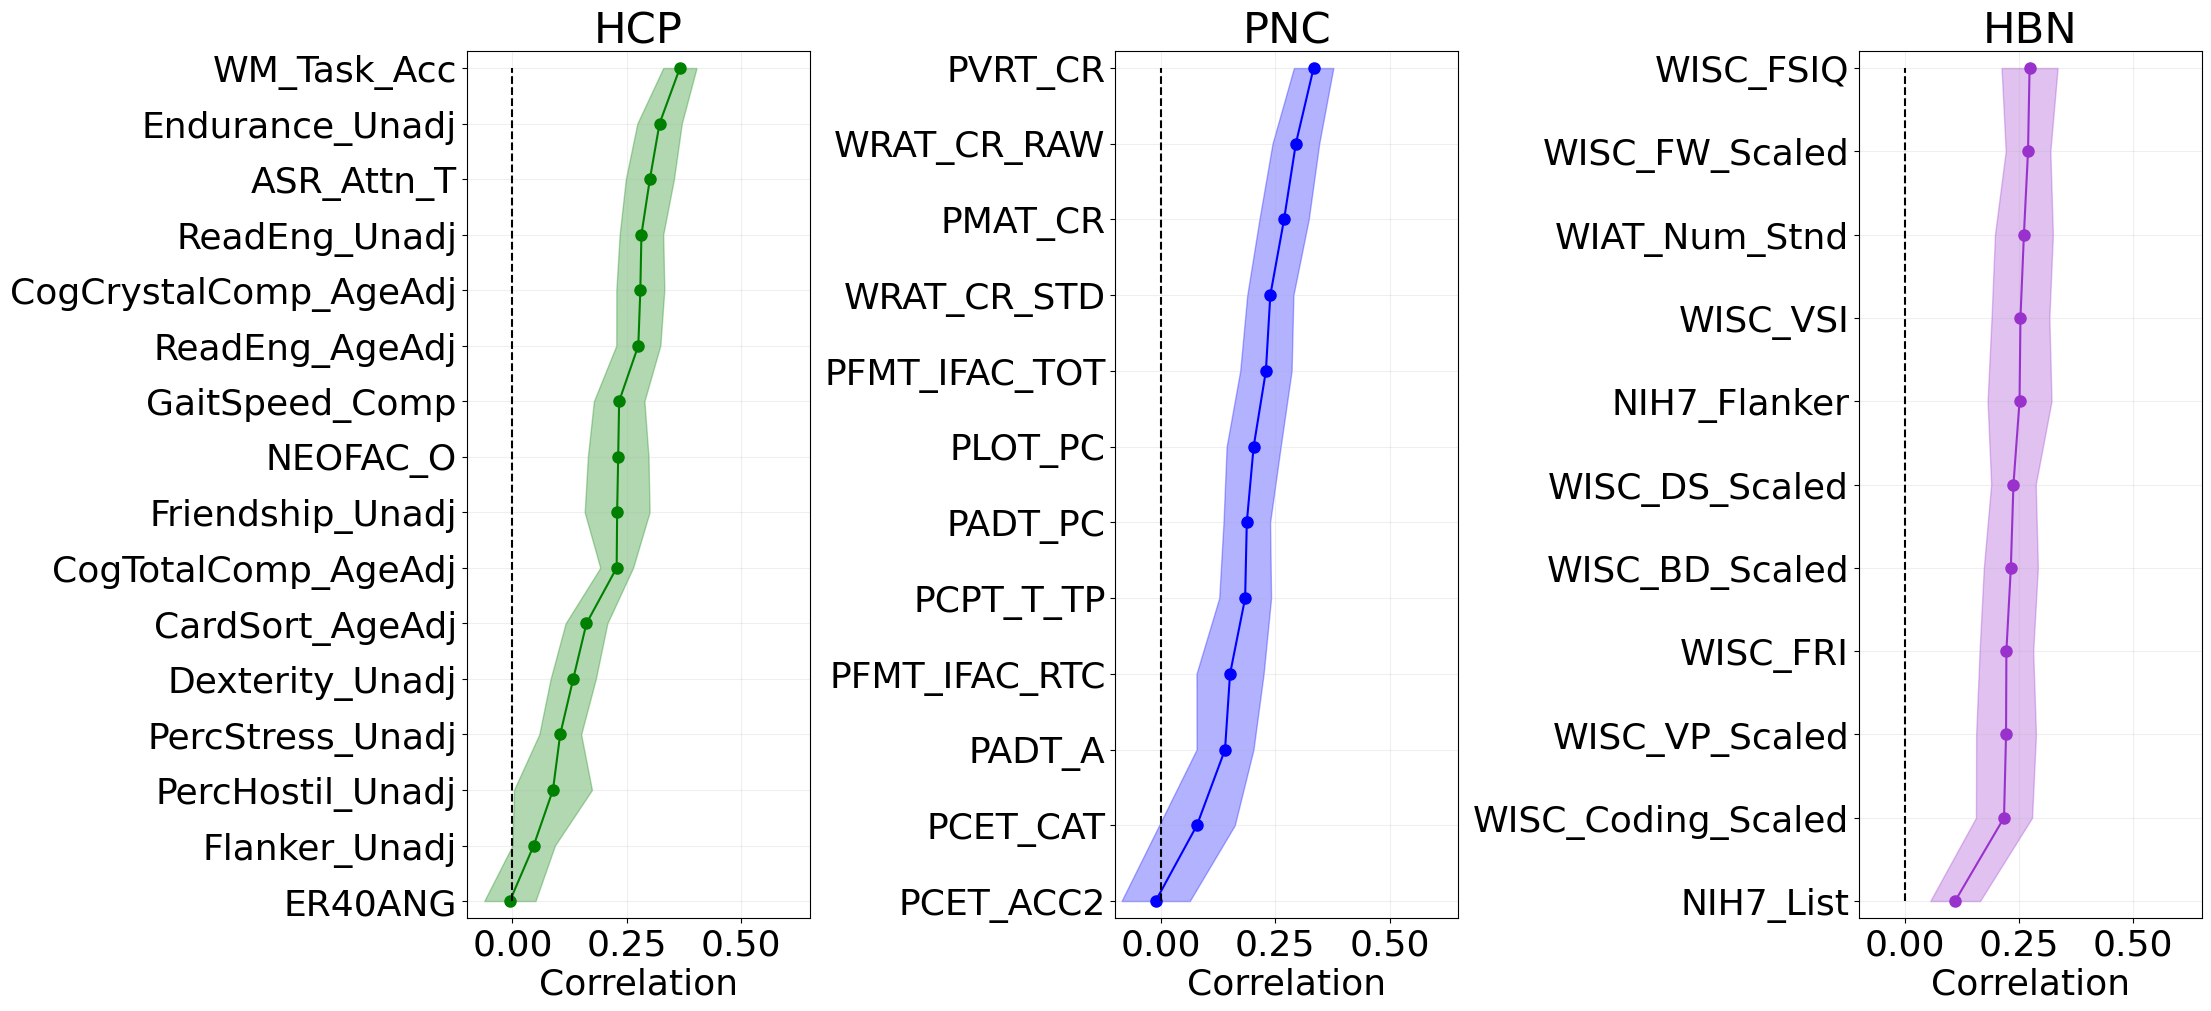

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(22, 10), layout='constrained')

###########################################################################################
# HCP
###########################################################################################
dataset = 'HCP'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [83]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_hcp_regression = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hcp_regression)/7))
indices = list(range(10)) + list(range(9, len(sorted_targets_hcp_regression), spacing)) # 22 elements
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
hcp_sorted_targets = sorted_targets_hcp_regression[indices]
# reverse order
selected_corr = selected_corr[::-1]
hcp_sorted_targets = hcp_sorted_targets[::-1]

# plot
ax[0].plot(selected_corr, hcp_sorted_targets,
    marker='o',
    markersize=8,
    color='green')
ax[0].fill_betweenx(hcp_sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='green')

ax[0].grid(alpha=.2)
ax[0].set_title(dataset)
ax[0].set_xlim([-.1, .65])

# add line at 0
ax[0].vlines(0, hcp_sorted_targets[0], hcp_sorted_targets[-1], colors='black', linestyle='dashed')
ax[0].set(xlabel="Correlation")
#ax[0].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])



###########################################################################################
# PNC
###########################################################################################
dataset = 'PNC'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [39]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_pnc_regression = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_pnc_regression)/3))
indices = list(range(10)) + list(range(9, len(sorted_targets_pnc_regression), spacing))
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
pnc_sorted_targets = sorted_targets_pnc_regression[indices]
# reverse order
selected_corr = selected_corr[::-1]
pnc_sorted_targets = pnc_sorted_targets[::-1]

# plot
ax[1].plot(selected_corr, pnc_sorted_targets,
    marker='o',
    markersize=8,
    color='blue')
ax[1].fill_betweenx(pnc_sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='blue')
ax[1].grid(alpha=.2)
ax[1].set_title(dataset)
ax[1].set(xlabel="Correlation")
ax[1].set_xlim([-.1, .65])
#ax[1].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])


# add line at 0
ax[1].vlines(0, pnc_sorted_targets[0], pnc_sorted_targets[-1], colors='black', linestyle='dashed')



###########################################################################################
# HBN
###########################################################################################
dataset = 'HBN'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [29]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_hbn_regression = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hbn_regression)/2))
indices = list(range(10)) + list(range(9, len(sorted_targets_hbn_regression), spacing))
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
hbn_sorted_targets = sorted_targets_hbn_regression[indices]
# reverse order
selected_corr = selected_corr[::-1]
hbn_sorted_targets = hbn_sorted_targets[::-1]

# plot
ax[2].plot(selected_corr, hbn_sorted_targets,
    marker='o',
    markersize=8,
    color='darkorchid')
ax[2].fill_betweenx(hbn_sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='darkorchid')
ax[2].grid(alpha=.2)
ax[2].set_title(dataset)
ax[2].set(xlabel="Correlation")
ax[2].set_xlim([-.1, .65])
#ax[2].set_xticks([-.1, 0, 0.2, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])

# add line at 0
ax[2].vlines(0, hbn_sorted_targets[0], hbn_sorted_targets[-1], colors='black', linestyle='dashed')

plt.savefig(output_dir / 'poster_regression.png', dpi=300)
plt.show()


# Regression (with no regression)

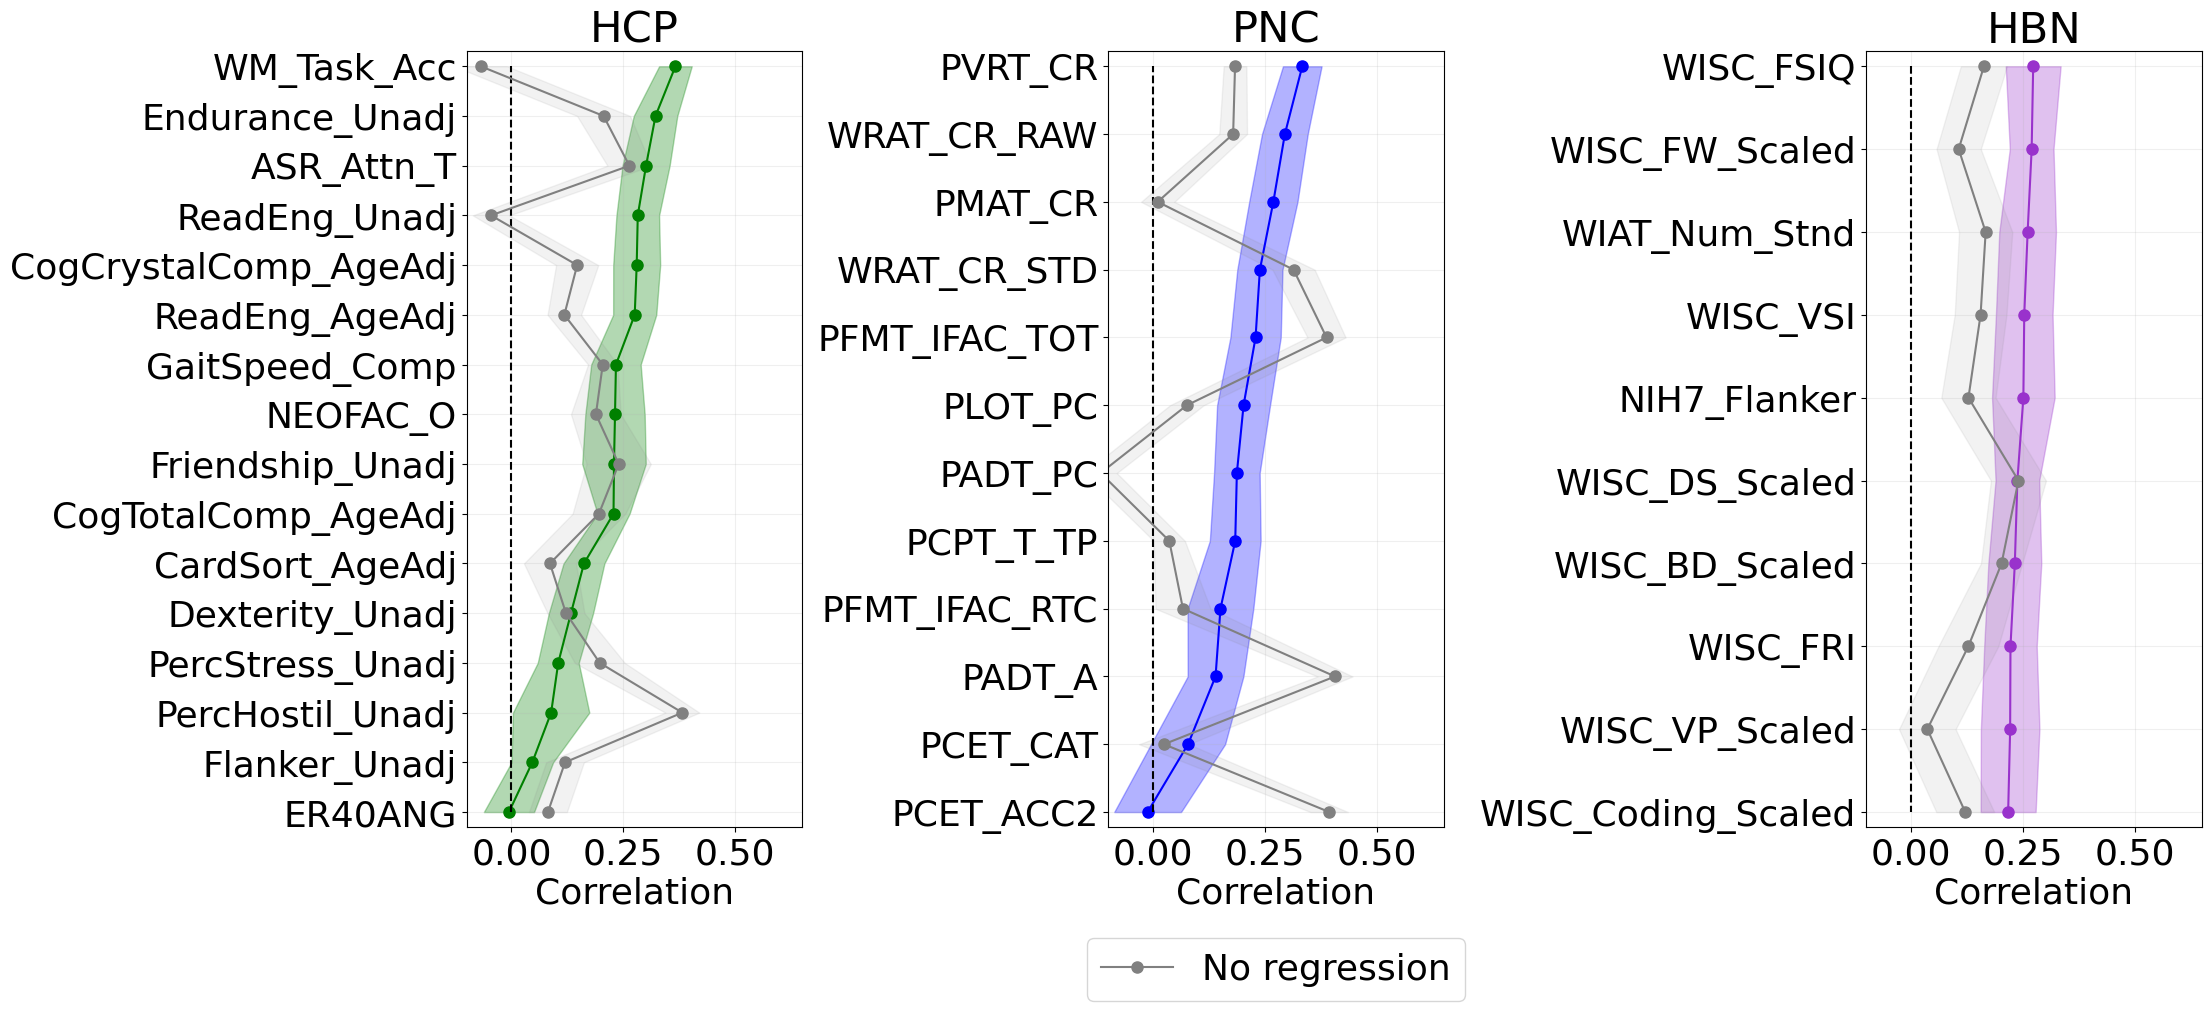

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(22, 10), layout='constrained')

###########################################################################################
# HCP
###########################################################################################
dataset = 'HCP'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [83]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_hcp = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hcp)/7))
indices = list(range(10)) + list(range(9, len(sorted_targets_hcp), spacing)) # 22 elements
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
sorted_targets = sorted_targets_hcp[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = sorted_targets[::-1]

# plot
ax[0].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='green')
ax[0].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='green')

ax[0].grid(alpha=.2)
ax[0].set_title(dataset)
ax[0].set_xlim([-.1, .65])

# add line at 0
ax[0].vlines(0, sorted_targets[0], sorted_targets[-1], colors='black', linestyle='dashed')
ax[0].set(xlabel="Correlation")
#ax[0].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])

ans = [np.where(selected_targets_no_regression_hcp==i)[0][0] for i in sorted_targets]
regression_top_values = np.mean(hcp_corr, axis=0)[ans][::-1]
ax[0].plot(regression_top_values, sorted_targets,
    marker='o',
    markersize=8,
    color='grey')
ax[0].fill_betweenx(sorted_targets,
                regression_top_values -
                np.std(hcp_corr, axis=0)[arg_sort][ans][::-1],
                regression_top_values +
                np.std(hcp_corr, axis=0)[arg_sort][ans][::-1],
                alpha=0.1,
                color='grey')
###########################################################################################
# PNC
###########################################################################################
dataset = 'PNC'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [39]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_pnc = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_pnc)/3))
indices = list(range(10)) + list(range(9, len(sorted_targets_pnc), spacing))
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
sorted_targets = sorted_targets_pnc[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = sorted_targets[::-1]

# plot
ax[1].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='blue')
ax[1].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='blue')
ax[1].grid(alpha=.2)
ax[1].set_title(dataset)
ax[1].set(xlabel="Correlation")
ax[1].set_xlim([-.1, .65])
#ax[1].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])


# add line at 0
ax[1].vlines(0, sorted_targets[0], sorted_targets[-1], colors='black', linestyle='dashed')

ans = [np.where(sorted_targets==i)[0][0] for i in sorted_targets]
regression_top_values = np.mean(pnc_corr, axis=0)[ans][::-1]
ax[1].plot(regression_top_values, sorted_targets,
    marker='o',
    markersize=8,
    color='grey',
    label='No regression')
ax[1].fill_betweenx(sorted_targets,
                regression_top_values -
                np.std(pnc_corr, axis=0)[arg_sort][ans][::-1],
                regression_top_values +
                np.std(pnc_corr, axis=0)[arg_sort][ans][::-1],
                alpha=0.1,
                color='grey')

ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

###########################################################################################
# HBN
###########################################################################################
dataset = 'HBN'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [29]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_hbn = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hcp)/2))
indices = list(range(10)) + list(range(9, len(sorted_targets_hbn), spacing))
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
selected_targets_regression_hbn = sorted_targets_hbn[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = selected_targets_regression_hbn[::-1]

# plot
ax[2].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='darkorchid')
ax[2].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='darkorchid')
ax[2].grid(alpha=.2)
ax[2].set_title(dataset)
ax[2].set(xlabel="Correlation")
ax[2].set_xlim([-.1, .65])
#ax[2].set_xticks([-.1, 0, 0.2, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])

# add line at 0
ax[2].vlines(0, selected_targets_regression_hbn[0], selected_targets_regression_hbn[-1], colors='black', linestyle='dashed')

ans = [np.where(selected_targets_no_regression_hbn==i)[0][0] for i in sorted_targets]
regression_top_values = np.mean(hbn_corr, axis=0)[ans][::-1]
ax[2].plot(regression_top_values, sorted_targets,
    marker='o',
    markersize=8,
    color='grey')
ax[2].fill_betweenx(sorted_targets,
                regression_top_values -
                np.std(hbn_corr, axis=0)[arg_sort][ans][::-1],
                regression_top_values +
                np.std(hbn_corr, axis=0)[arg_sort][ans][::-1],
                alpha=0.1,
                color='grey')


plt.savefig(output_dir / 'poster_regression_mixed.png', dpi=300)
plt.show()


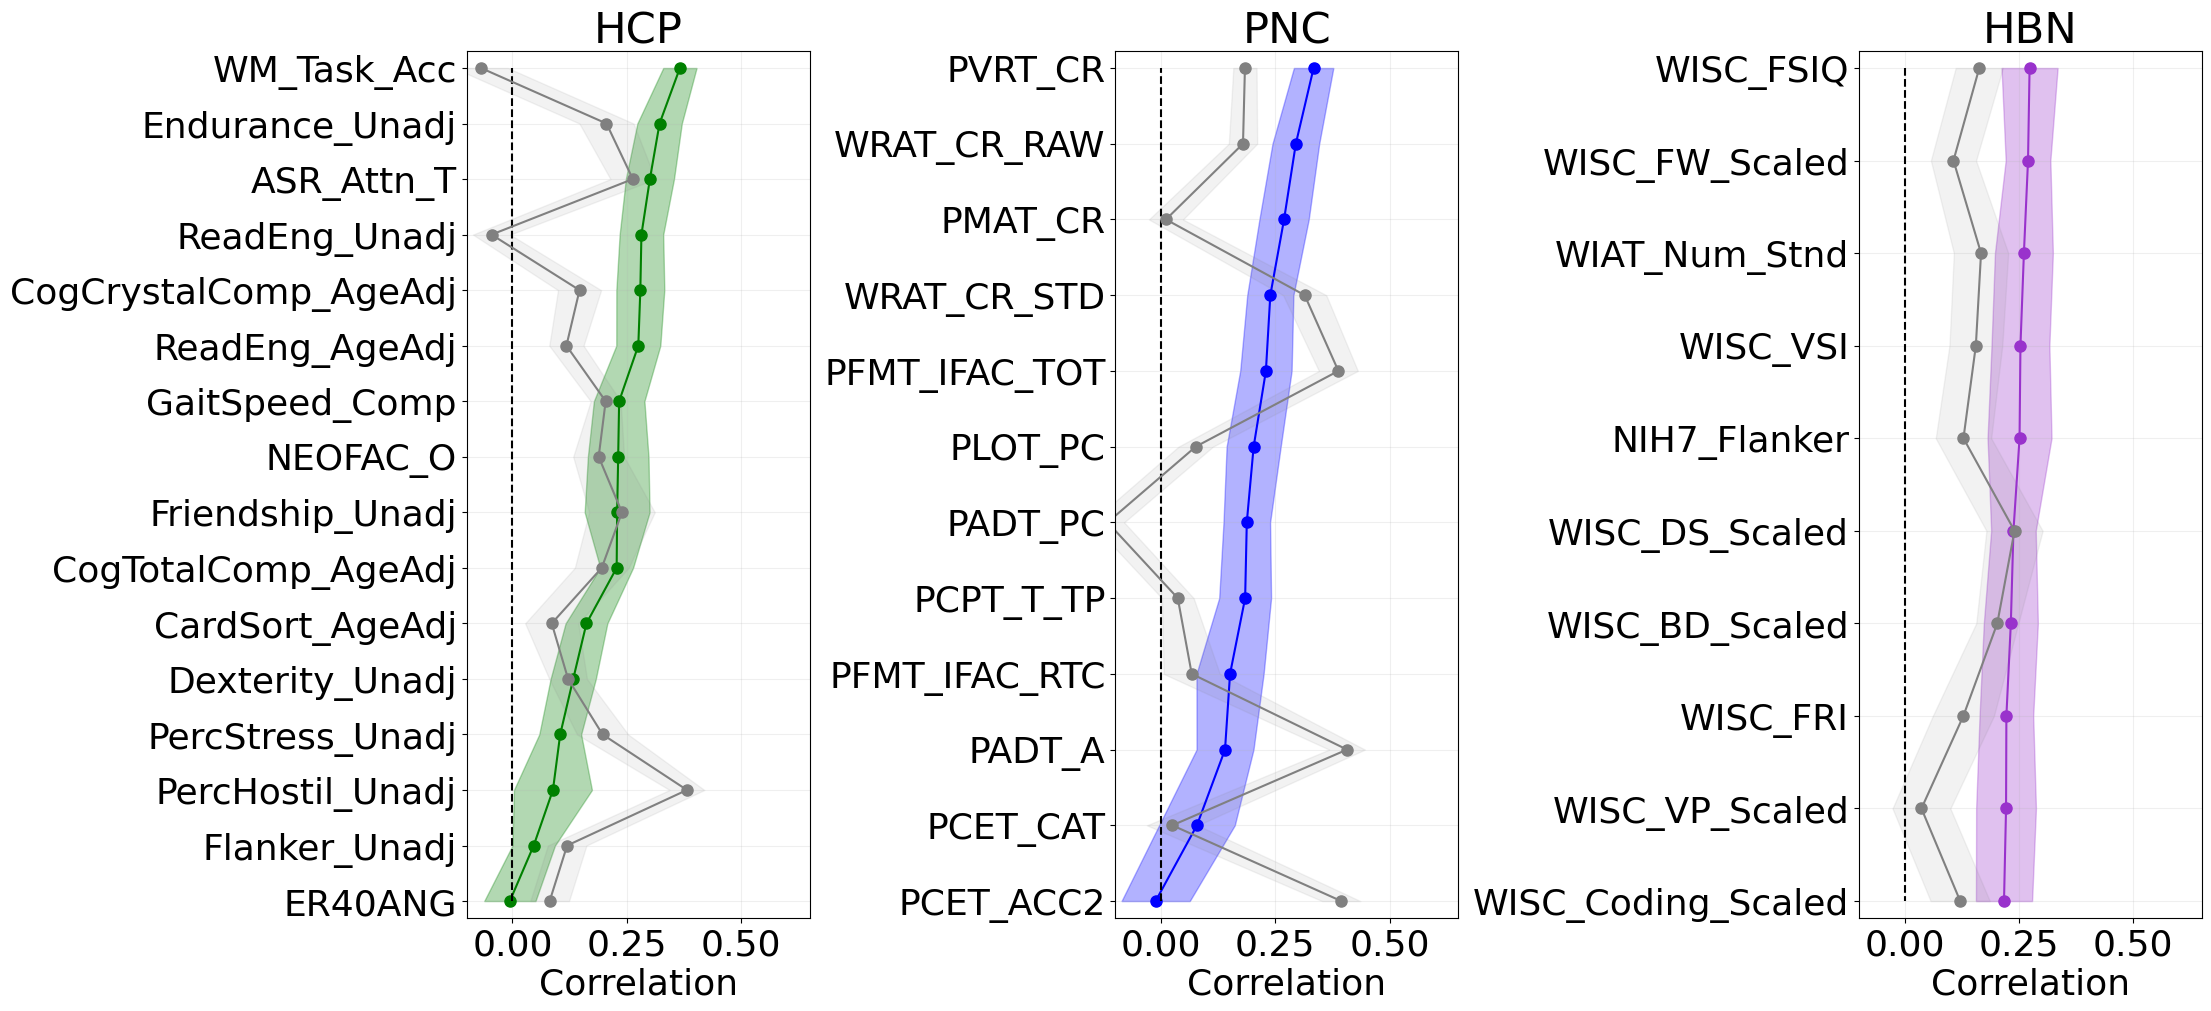

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(22, 10), layout='constrained')

###########################################################################################
# HCP
###########################################################################################
dataset = 'HCP'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [83]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_hcp = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hcp)/7))
indices = list(range(10)) + list(range(9, len(sorted_targets_hcp), spacing)) # 22 elements
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
sorted_targets = sorted_targets_hcp[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = sorted_targets[::-1]

# plot
ax[0].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='green')
ax[0].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='green')

ax[0].grid(alpha=.2)
ax[0].set_title(dataset)
ax[0].set_xlim([-.1, .65])

# add line at 0
ax[0].vlines(0, sorted_targets[0], sorted_targets[-1], colors='black', linestyle='dashed')
ax[0].set(xlabel="Correlation")
#ax[0].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])

ans = [np.where(selected_targets_no_regression_hcp==i)[0][0] for i in sorted_targets]
regression_top_values = np.mean(hcp_corr, axis=0)[ans][::-1]
ax[0].plot(regression_top_values, sorted_targets,
    marker='o',
    markersize=8,
    color='grey')
ax[0].fill_betweenx(sorted_targets,
                regression_top_values -
                np.std(hcp_corr, axis=0)[arg_sort][ans][::-1],
                regression_top_values +
                np.std(hcp_corr, axis=0)[arg_sort][ans][::-1],
                alpha=0.1,
                color='grey')
###########################################################################################
# PNC
###########################################################################################
dataset = 'PNC'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [39]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_pnc = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_pnc)/3))
indices = list(range(10)) + list(range(9, len(sorted_targets_pnc), spacing))
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
sorted_targets = sorted_targets_pnc[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = sorted_targets[::-1]

# plot
ax[1].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='blue')
ax[1].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='blue')
ax[1].grid(alpha=.2)
ax[1].set_title(dataset)
ax[1].set(xlabel="Correlation")
ax[1].set_xlim([-.1, .65])
#ax[1].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])


# add line at 0
ax[1].vlines(0, sorted_targets[0], sorted_targets[-1], colors='black', linestyle='dashed')

ans = [np.where(sorted_targets==i)[0][0] for i in sorted_targets]
regression_top_values = np.mean(pnc_corr, axis=0)[ans][::-1]
ax[1].plot(regression_top_values, sorted_targets,
    marker='o',
    markersize=8,
    color='grey',
    label='No regression')
ax[1].fill_betweenx(sorted_targets,
                regression_top_values -
                np.std(pnc_corr, axis=0)[arg_sort][ans][::-1],
                regression_top_values +
                np.std(pnc_corr, axis=0)[arg_sort][ans][::-1],
                alpha=0.1,
                color='grey')

###########################################################################################
# HBN
###########################################################################################
dataset = 'HBN'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset
recons = [29]

folder_name = f'regress_covariates_predictions-{dataset.lower()}_test'
metrics = np.load(file_dir / folder_name / 'metrics.npz', allow_pickle=True)
with open(file_dir / folder_name / 'metrics.pickle', 'rb') as handle:
    metrics_dic = pickle.load(handle)
  
corr = np.array(metrics_dic['Correlation'])
sorted_targets_hbn = metrics['sorted_targets']
arg_sort = metrics['arg_sort']

# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hcp)/2))
indices = list(range(10)) + list(range(9, len(sorted_targets_hbn), spacing))
indices = sorted(set(indices)) # ensure no duplicates
selected_corr = np.mean(corr, axis=0)[arg_sort][indices]
selected_targets_regression_hbn = sorted_targets_hbn[indices]
# reverse order
selected_corr = selected_corr[::-1]
sorted_targets = selected_targets_regression_hbn[::-1]

# plot
ax[2].plot(selected_corr, sorted_targets,
    marker='o',
    markersize=8,
    color='darkorchid')
ax[2].fill_betweenx(sorted_targets,
                selected_corr -
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                selected_corr +
                np.std(corr, axis=0)[arg_sort][indices][::-1],
                alpha=0.3,
                color='darkorchid')
ax[2].grid(alpha=.2)
ax[2].set_title(dataset)
ax[2].set(xlabel="Correlation")
ax[2].set_xlim([-.1, .65])
#ax[2].set_xticks([-.1, 0, 0.2, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])

# add line at 0
ax[2].vlines(0, selected_targets_regression_hbn[0], selected_targets_regression_hbn[-1], colors='black', linestyle='dashed')

ans = [np.where(selected_targets_no_regression_hbn==i)[0][0] for i in sorted_targets]
regression_top_values = np.mean(hbn_corr, axis=0)[ans][::-1]
ax[2].plot(regression_top_values, sorted_targets,
    marker='o',
    markersize=8,
    color='grey')
ax[2].fill_betweenx(sorted_targets,
                regression_top_values -
                np.std(hbn_corr, axis=0)[arg_sort][ans][::-1],
                regression_top_values +
                np.std(hbn_corr, axis=0)[arg_sort][ans][::-1],
                alpha=0.1,
                color='grey')


plt.savefig(output_dir / 'poster_regression_mixed_no_legend.png', dpi=300)
plt.show()


# Reconstruction

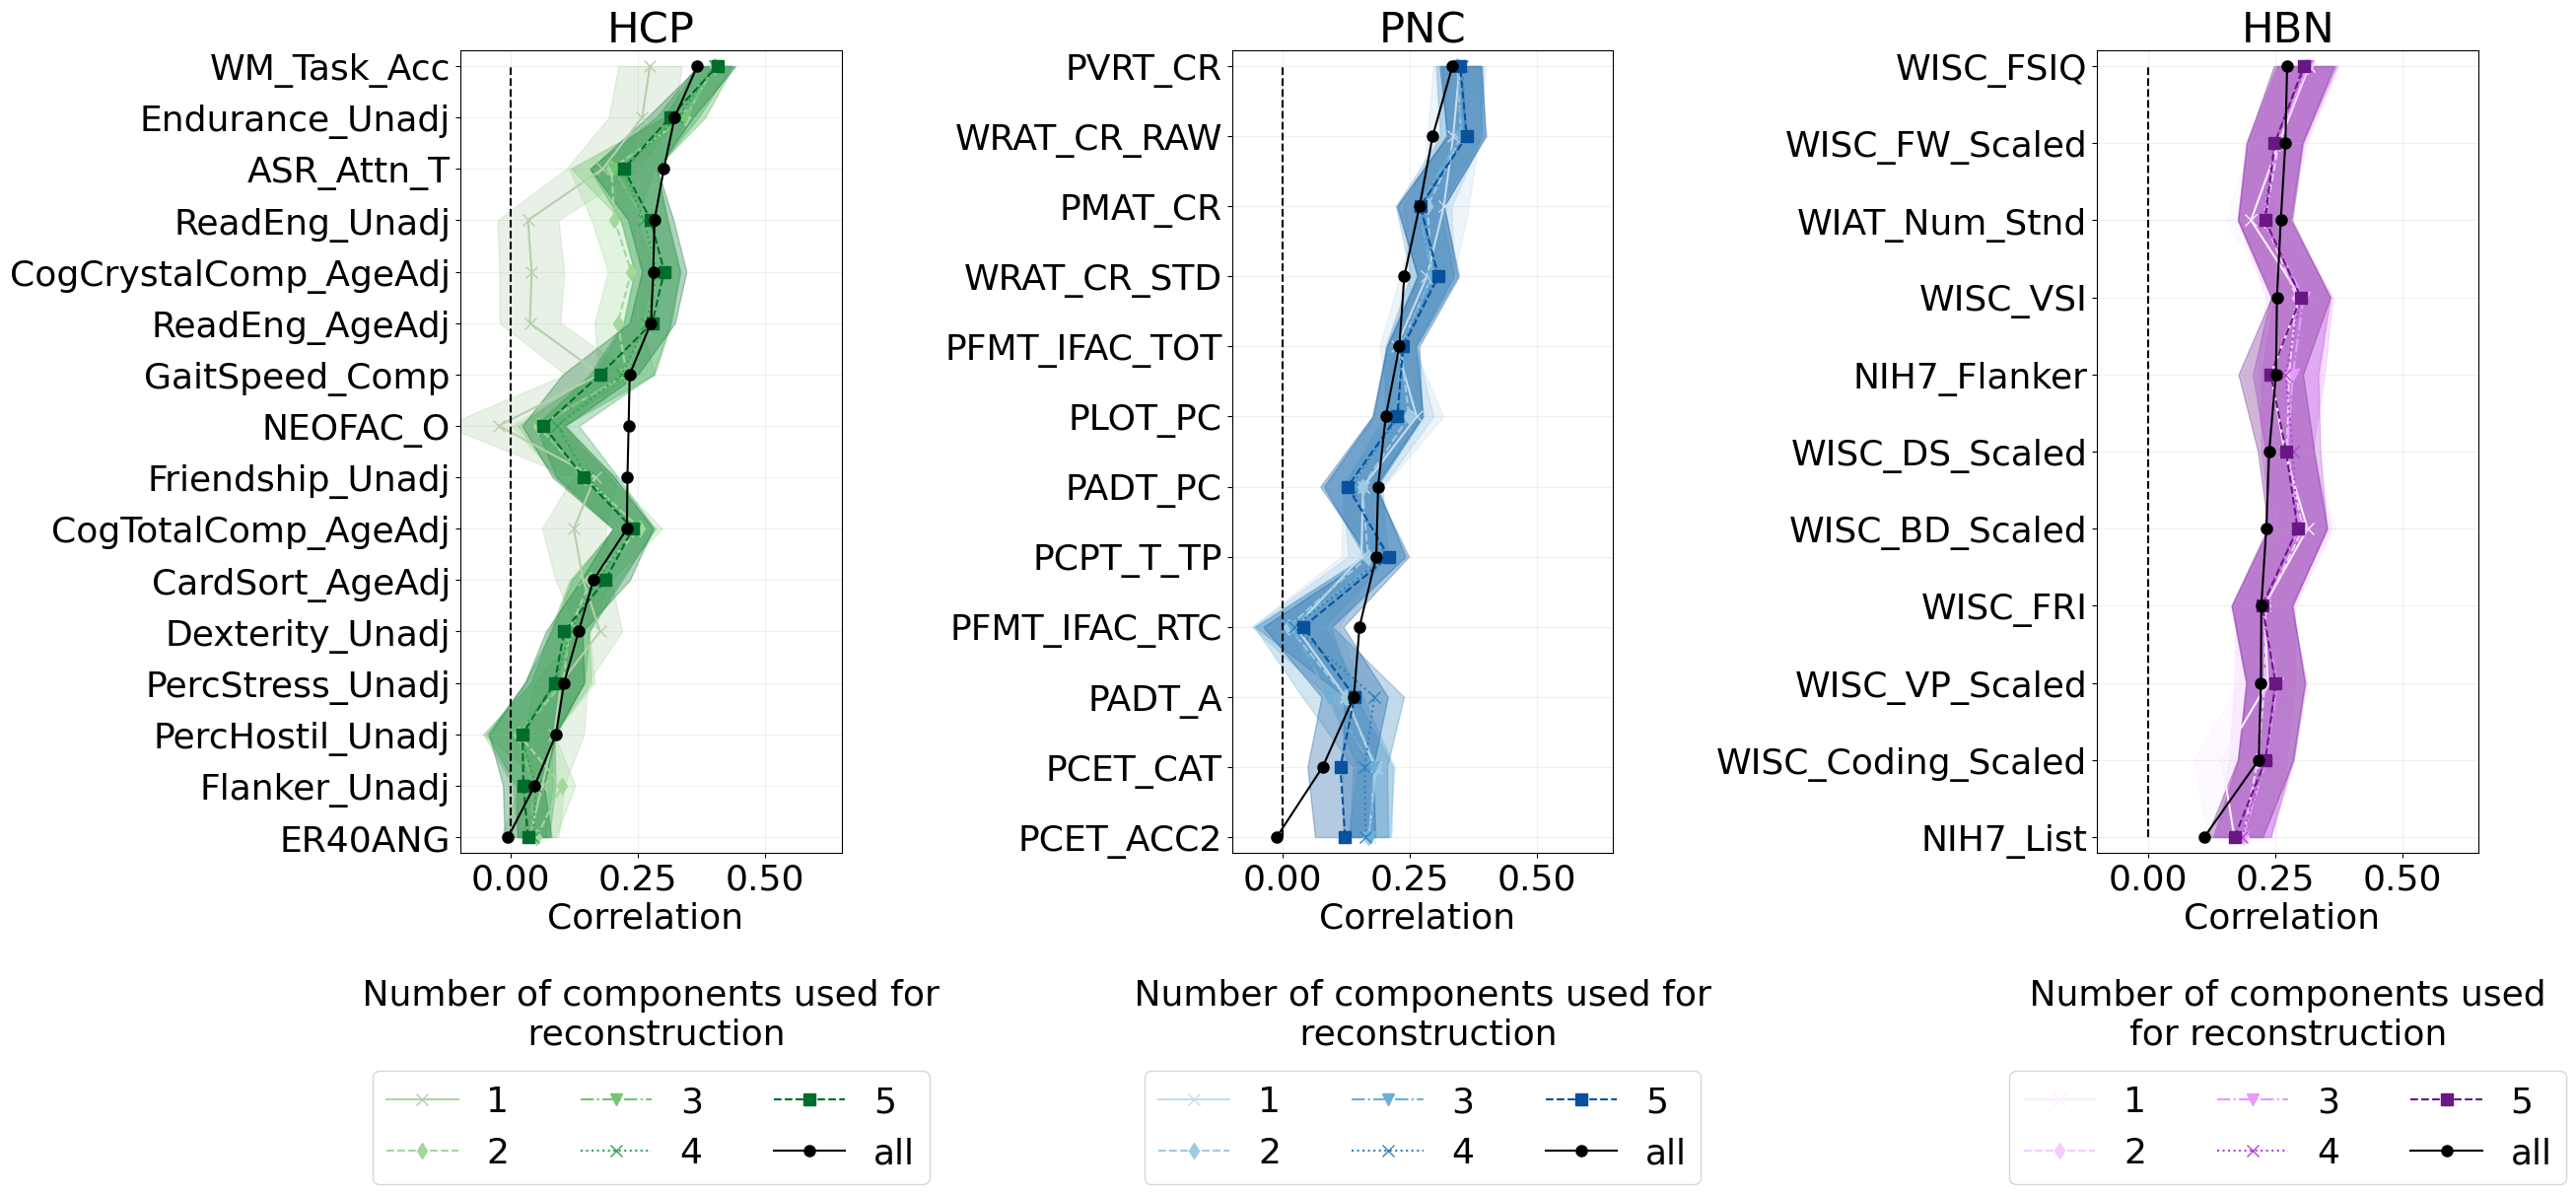

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(26, 12), layout='constrained')


# general settings
markers = ['x', 'd', 'v', 'x', 's', 'o']
linestyle = ['-' , '--' , '-.' , ':', '--', '-']


###########################################################################################
# HCP
###########################################################################################
dataset = 'HCP'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset

# Dataset specific settings
recons = [1, 2, 3, 4, 5, 83]
colors=['#b3d1ac', '#a1d99b', '#74c476', '#31a354', '#006d2c', 'k']
alphas = np.arange(0.2, 1, 1/(len(recons) + 1))

df_corr_mean_hcp, df_corr_std_hcp, df_r2_mean_hcp, df_r2_std_hcp, sorted_targets_hcp = load_data_reconstruction(dataset, file_dir, y_val)
# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hcp)/7))
indices = list(range(10)) + list(range(9, len(sorted_targets_hcp), spacing))
indices = sorted(set(indices)) # ensure no duplicates


 # plot
for idx, n_recons in enumerate(recons, 1):
    selected_corr = df_corr_mean_hcp[f'mean_{n_recons}'].iloc[indices]
    selected_std = df_corr_std_hcp[f'std_{n_recons}'].iloc[indices]
    selected_targets = sorted_targets_hcp[indices]
    # reverse order
    selected_corr = selected_corr.iloc[::-1]
    selected_std = selected_std.iloc[::-1]
    selected_targets = selected_targets[::-1]
    
    ax[0].plot(selected_corr, selected_targets,
        marker=markers[idx-1],
        linestyle=linestyle[idx-1],
        markersize=8,
        label='all' if n_recons == recons[-1] else n_recons,
        color=colors[idx-1])
    if n_recons != recons[-1]:
        ax[0].fill_betweenx(selected_targets,
                    selected_corr -
                    selected_std,
                    selected_corr +
                    selected_std,
                    alpha=0.3,
                    color=colors[idx-1])
    ax[0].set_title(dataset)
    ax[0].grid(alpha=.2)

# add line at 0
ax[0].vlines(0, selected_targets[0], selected_targets[-1], colors='black', linestyle='dashed')
# add legends
ax[0].set(xlabel="Correlation \n \n Number of components used for \n reconstruction")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3)
#ax[0].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])
ax[0].set_xlim([-.1, .65])


###########################################################################################
# PNC
###########################################################################################
dataset = 'PNC'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset

# Dataset specific settings
recons =  [1, 2, 3, 4, 5, 39]
colors=['#c6dbef', '#9ecae1', '#6baed6', '#3182bd', '#08519c', 'k']
alphas = np.arange(0.2, 1, 1/(len(recons) + 1))

df_corr_mean_hcp, df_corr_std_hcp, df_r2_mean_hcp, df_r2_std_hcp, sorted_targets_hcp = load_data_reconstruction(dataset, file_dir, y_val)
# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hcp)/3))
indices = list(range(10)) + list(range(9, len(sorted_targets_hcp), spacing))
indices = sorted(set(indices)) # ensure no duplicates


 # plot
for idx, n_recons in enumerate(recons, 1):
    selected_corr = df_corr_mean_hcp[f'mean_{n_recons}'].iloc[indices]
    selected_std = df_corr_std_hcp[f'std_{n_recons}'].iloc[indices]
    selected_targets = sorted_targets_hcp[indices]
    # reverse order
    selected_corr = selected_corr.iloc[::-1]
    selected_std = selected_std.iloc[::-1]
    selected_targets = selected_targets[::-1]
    
    ax[1].plot(selected_corr, selected_targets,
        marker=markers[idx-1],
        linestyle=linestyle[idx-1],
        markersize=8,
        label='all' if n_recons == recons[-1] else n_recons,
        color=colors[idx-1])
    if n_recons != recons[-1]:
        ax[1].fill_betweenx(selected_targets,
                    selected_corr -
                    selected_std,
                    selected_corr +
                    selected_std,
                    alpha=0.3,
                    color=colors[idx-1])
    ax[1].set_title(dataset)
    ax[1].grid(alpha=.2)

# add line at 0
ax[1].vlines(0, selected_targets[0], selected_targets[-1], colors='black', linestyle='dashed')
# add legends
ax[1].set(xlabel="Correlation \n \n Number of components used for \n reconstruction")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3)
ax[1].set_xlim([-.1, .65])

#ax[1].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])




###########################################################################################
# HBN
###########################################################################################
dataset = 'HBN'
y_val = 'orig'
file_dir = project_dir / 'outputs' / dataset

# Dataset specific settings
recons = [1, 2, 3, 4, 5, 29]
colors=['#fbeeff', '#f3ccff', '#e79aff', '#b148d2', '#691883', 'k']
alphas = np.arange(0.2, 1, 1/(len(recons) + 1))

df_corr_mean_hcp, df_corr_std_hcp, df_r2_mean_hcp, df_r2_std_hcp, sorted_targets_hcp = load_data_reconstruction(dataset, file_dir, y_val)
# Select the first 10 elements and every 5th element
#indices = list(range(20))
spacing = int(np.floor(len(sorted_targets_hcp)/2))
indices = list(range(10)) + list(range(9, len(sorted_targets_hcp), spacing))
indices = sorted(set(indices)) # ensure no duplicates


 # plot
for idx, n_recons in enumerate(recons, 1):
    selected_corr = df_corr_mean_hcp[f'mean_{n_recons}'].iloc[indices]
    selected_std = df_corr_std_hcp[f'std_{n_recons}'].iloc[indices]
    selected_targets = sorted_targets_hcp[indices]
    # reverse order
    selected_corr = selected_corr.iloc[::-1]
    selected_std = selected_std.iloc[::-1]
    selected_targets = selected_targets[::-1]
    
    ax[2].plot(selected_corr, selected_targets,
        marker=markers[idx-1],
        linestyle=linestyle[idx-1],
        markersize=8,
        label='all' if n_recons == recons[-1] else n_recons,
        color=colors[idx-1])
    if n_recons != recons[-1]:
        ax[2].fill_betweenx(selected_targets,
                    selected_corr -
                    selected_std,
                    selected_corr +
                    selected_std,
                    alpha=0.3,
                    color=colors[idx-1])
    ax[2].set_title(dataset)
    ax[2].grid(alpha=.2)

# add line at 0
ax[2].vlines(0, selected_targets[0], selected_targets[-1], colors='black', linestyle='dashed')
# add legends
ax[2].set(xlabel="Correlation \n \n Number of components used \nfor reconstruction")
ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3)
ax[2].set_xlim([-.1, .65])
#ax[2].set_xticks([-.1, 0, 0.1, 0.2, 0.3, 0.4], labels=[-.1, 0, 0.1, 0.2, 0.3, 0.4])

plt.savefig(output_dir / 'poster_reconstruction.png', dpi=300)
plt.show()
